<a href="https://colab.research.google.com/github/nladocsi/eda_assignment/blob/main/eda_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.


**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

In [ ]:
#1.4
#If it is a non-decreasing transformation of the median then median(f(x)) = f(median(x)).
#This can be explained because the median is a order statistic. The median relies on a sorted order of values.
#In a non-decreasing transformation the relative order of the data points does not change.
#This does apply to any quantile, and the IQR, but not the range because the range does not just rely on order but actual value.

#1.5
#No it is not always true that m(g(X)) = g(m(X)). Mean is not an order function it depends on the actual values of the data.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#2.1
air = pd.read_csv('airbnb_hw.csv')

In [ ]:
#2.2
print("air.shape:")
print(air.shape, '\n')
print('30478 observations', '\n')
#There are 30478 observations
print("air.variables:")
print(air.columns, '\n')

print(air.head())

In [ ]:
#2.3
pd.crosstab(air['Room Type'], air['Property Type'])
#Patterns: The more unique, non traditional rentals are less popular (ex apartments = lots, castles = one). Overall shared rooms are the least ppopular.
#Private rooms are more common than entire property for Bed & Breakfast, Homes, dorms, treehouses, huts, castles, chalets and other

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


<Axes: >

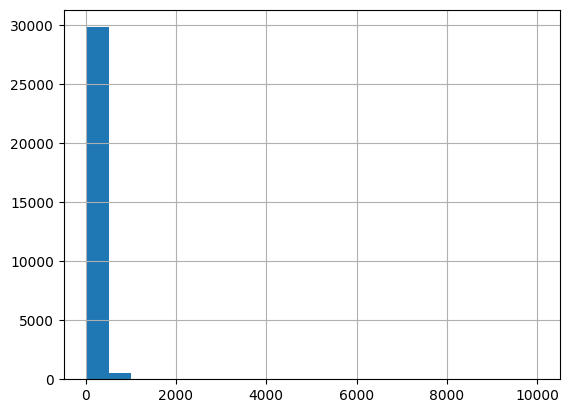

In [3]:
#2.4.1
if air ['Price'].dtype == 'object':
  air['Price'] = air['Price'].str.replace(',', '', regex=False)
  air['Price'] = pd.to_numeric(air['Price'], errors='coerce')
#print(air['Price'].value_counts(), '\n')
#print(air['Price'].unique(),'\n')
#Histogram
air['Price'].hist(bins=20)
#clip_price = air['Price'].clip(upper=300)
#clip_price.hist(bins=20)

<Axes: ylabel='Density'>

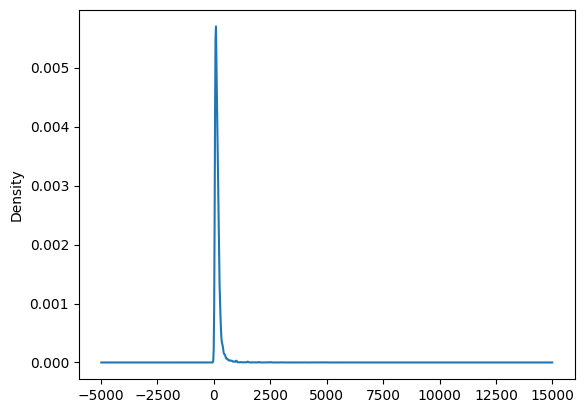

In [ ]:
#2.4.2
#Kernel Density
air['Price'].plot.density()
#clip_price.plot.density()

<Axes: >

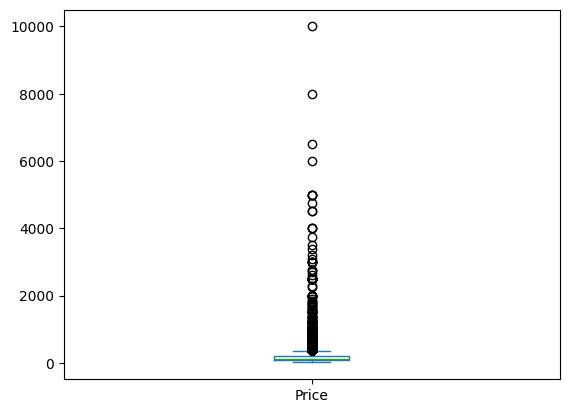

In [ ]:
# 2.4.3
air['Price'].plot.box()
#clip_price.plot.box()
#  box plot, and a statistical description of the variable

In [6]:
#2.4.3
print(air['Price'].describe())
#In my opinion the data is not well scaled because the min and max have such a great differnece, and the 75% is so much smaller than the max.
#Yes there are significant outliers

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64


<Axes: >

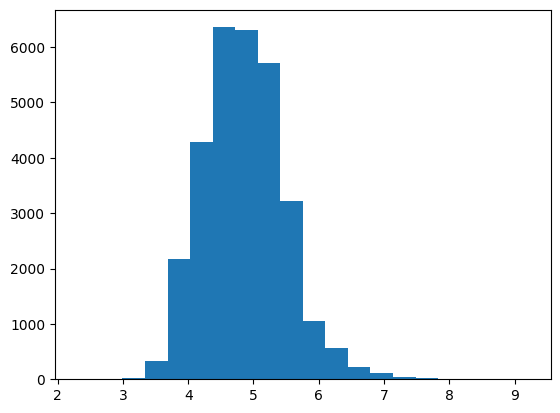

In [4]:
#2.4.4
air['Price_log'] = np.log(air['Price'])
air.loc[air['Price_log']>0,'Price_log'].hist(bins=20,grid=False)

<Axes: ylabel='Density'>

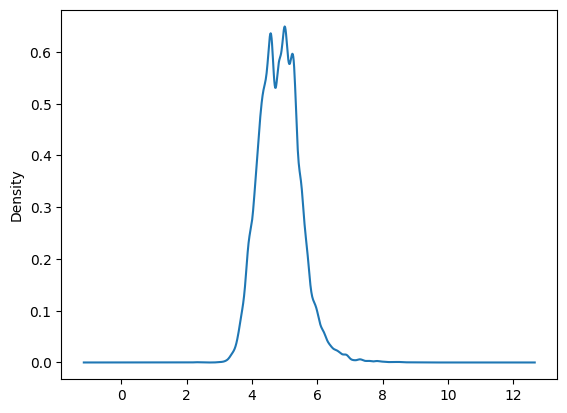

In [ ]:
air['Price_log'].plot.density()


<Axes: >

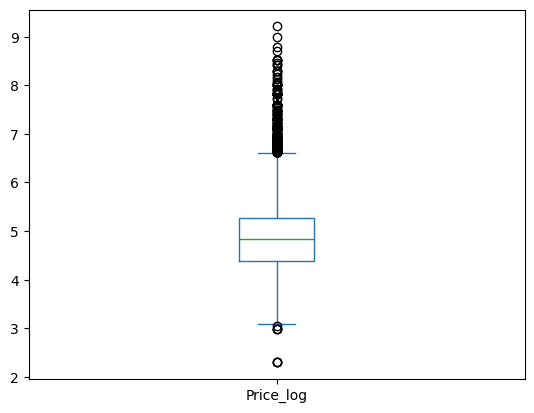

In [ ]:
air['Price_log'].plot.box()


In [ ]:
print(air['Price_log'].describe())

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: Price_log, dtype: float64


,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,92.000000,38.183766,65.0,78.50,92.0,105.50,119.0
1.0,20344.0,127.673810,107.047827,10.0,75.00,100.0,155.00,4000.0
2.0,6610.0,199.061271,225.706318,25.0,115.00,160.0,225.00,10000.0
3.0,2071.0,268.118300,303.106942,26.0,140.00,200.0,300.00,5000.0
4.0,783.0,315.332056,353.184402,27.0,150.00,247.0,375.00,6500.0
5.0,284.0,411.500000,672.610659,35.0,189.75,290.0,450.00,8000.0
6.0,177.0,401.768362,417.018431,35.0,199.00,275.0,425.00,2750.0
7.0,45.0,341.377778,220.116631,55.0,177.00,300.0,445.00,900.0
8.0,24.0,589.041667,793.054934,55.0,243.75,350.0,481.25,4000.0


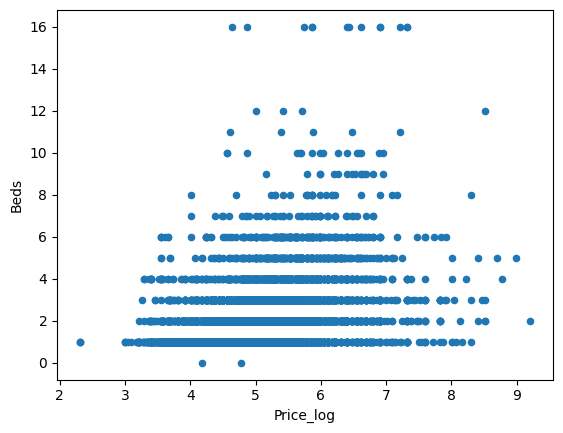

In [5]:
#2.5
#print(air['Beds'].unique(),'\n')
air.plot.scatter(x='Price_log', y='Beds')
air.groupby('Beds')['Price'].describe()
#The standard deviation is

<Axes: xlabel='Price_log', ylabel='Beds'>

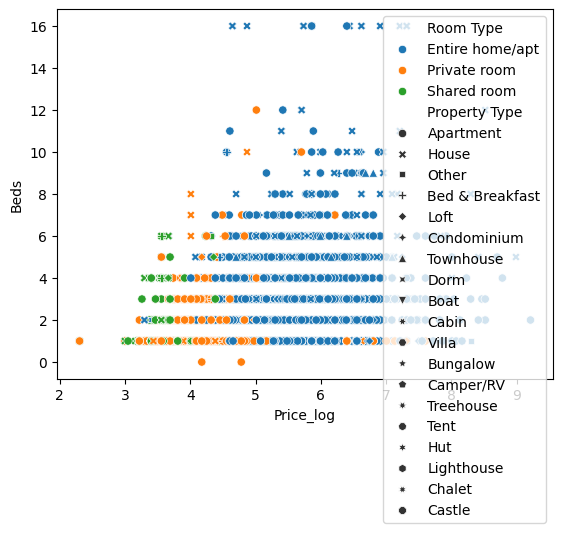

In [16]:
#2.6
import seaborn as sns
sns.scatterplot(data=air, x='Price_log', y="Beds", hue='Room Type', style='Property Type')
#Entire homes/apartments have the highest prices on average. Also apartment

**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.